In [1]:
# Importing necessary Libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading train dataset
df_train=pd.read_csv('train_agriculture.csv')

In [3]:
# loading test dataset
df_test=pd.read_csv('test_agriculture.csv')

In [4]:
df_train.shape

(88858, 10)

In [5]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


The Above Dataset Contains columns as:-

    1. ID-- Unique ID
    2. Estimated_Insects_Count-- Estimated Insects Counts per square meter.
    3. Crop_type -- Category of crop (0 or 1)
    4. Soil_type -- Category of soil (0 or 1)
    5. Pesticide_Use_Category -- Type of pesticide used (1 - Never, 2- Previously Used, 3- Currently used)
    6. Number_Doses_Week -- Number of doses per week
    7. Number_Weeks_Used -- Number of weeks used
    8. Number_Weeks_Quit -- Number of weeks quit
    9. Season -- Session Category (1,2,3)
    10. Crop_Damage -- Crop Damage Category (0-alive, 1-Damage due to other cases, 2- Damage due to pesticide)

In [6]:
df_train['Crop_Type'].unique()

array([1, 0])

In [7]:
# Target Variable 
df_train['Crop_Damage'].unique()

array([0, 1, 2])

In [8]:
df_train['Soil_Type'].unique()

array([0, 1])

In [9]:
df_train['Number_Doses_Week'].unique()

array([ 0, 30, 40, 60, 20, 25, 45, 50, 15, 10,  5, 35, 70, 55, 80, 90, 85,
       65, 75, 95])

In [10]:
df_train['Season'].unique()

array([1, 2, 3])

<AxesSubplot:xlabel='Crop_Damage', ylabel='count'>

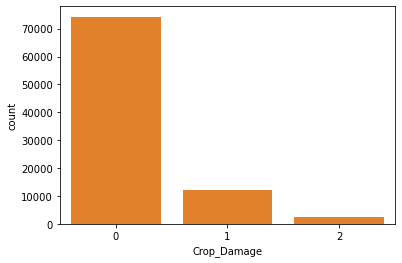

In [11]:
# Plotting of Crop damage 
color=sns.color_palette()[1]
sns.countplot(data=df_train,x='Crop_Damage',color=color)

<AxesSubplot:xlabel='Estimated_Insects_Count'>

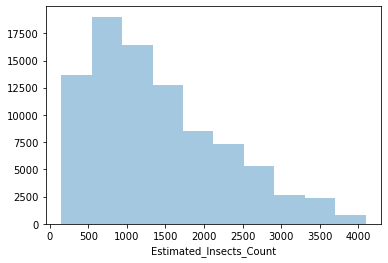

In [12]:
sns.distplot(df_train['Estimated_Insects_Count'],bins=10,kde=False)

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

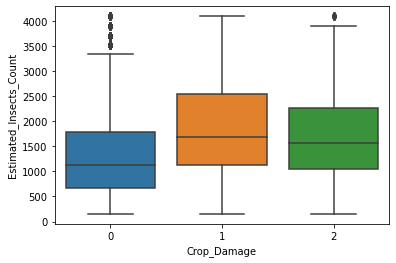

In [13]:
sns.boxplot(x=df_train['Crop_Damage'],y=df_train['Estimated_Insects_Count'])

In [14]:
df_train['Estimated_Insects_Count'].describe()

count    88858.000000
mean      1399.012210
std        849.048781
min        150.000000
25%        731.000000
50%       1212.000000
75%       1898.000000
max       4097.000000
Name: Estimated_Insects_Count, dtype: float64

In [15]:
df_train.Number_Weeks_Used.unique()

array([ 0., nan, 26., 20., 15., 14., 19., 24.,  8., 23., 25., 28., 29.,
       22., 21., 17., 30., 35., 32., 27., 16., 31., 33., 34., 39., 38.,
       42., 40., 41., 36., 44., 37., 46., 45., 47., 43., 50., 10., 49.,
       53., 48., 51., 54., 52., 55., 56., 61., 18., 57., 62., 60., 63.,
       66., 59., 64., 13.,  7.,  5., 12.,  6.,  9., 58., 11., 65., 67.])

In [16]:
df_train['Number_Weeks_Quit'].unique()

array([ 0,  1,  9,  4, 13,  3, 14,  6,  2, 12, 15, 10,  8, 11,  7,  5, 17,
       18, 16, 20, 21, 19, 22, 24, 23, 27, 25, 28, 26, 29, 30, 31, 33, 32,
       36, 37, 34, 39, 44, 41, 35, 47, 46, 40, 42, 38, 43, 45, 49, 50, 48])

<AxesSubplot:>

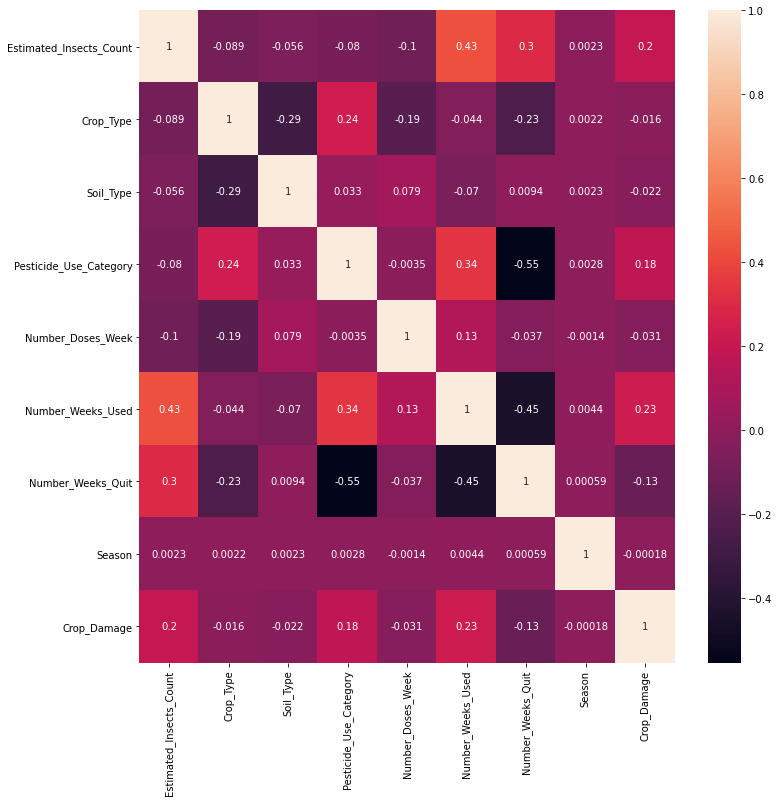

In [17]:
plt.figure(figsize=(12,12));
sns.heatmap(df_train.corr(),annot=True)

From the above chart we see that crop damage has a decent corelation with the numerical variables

Estimated_Insects_Count , Number_Weeks_quit and Number weeks used ,Pesticide_Use_Catergory

So lets magnify this effects by using SKleanr polynomal feature extractor

### Feature Engineering

In [18]:
df_test['is_test']=1
df_train['is_test']=0

data=pd.concat([df_train,df_test]).reset_index(drop=True)
data.shape

(90057, 11)

In [19]:
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9119
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
is_test                       0
dtype: int64

In [20]:
# Lets one hot encode the categorical variable 

data=pd.get_dummies(data,columns=['Crop_Type','Soil_Type','Season','Pesticide_Use_Category'])
data.shape

(90057, 17)

In [21]:
# Building a Linear Regression model to Predict Null Values in Number_Weeks_Used column
# Let build a Simple Lasso Liner regression model to predict the missing values 

# Split Data into Train and Test sets 
null_train=data[data['Number_Weeks_Used'].notnull()]
null_test=data[data['Number_Weeks_Used'].isnull()]


X_train,X_val,y_train,y_val=model_selection.train_test_split(null_train.drop(columns=['ID','is_test','Crop_Damage','Number_Weeks_Used'],axis=1),
                                                                             null_train['Number_Weeks_Used'].values,random_state=7)

#Normalize the features 

for col in ['Estimated_Insects_Count','Number_Weeks_Quit', 'Number_Doses_Week']:
    scaler=preprocessing.StandardScaler()
    scaler.fit(X_train[col].values.reshape(-1,1))
    X_train.loc[:,col]=scaler.transform(X_train[col].values.reshape(-1,1))
    X_val.loc[:,col]=scaler.transform(X_val[col].values.reshape(-1,1))
    null_test.loc[:,col]=scaler.transform(null_test[col].values.reshape(-1,1))
    
# Normalize Y variable 

scaler=preprocessing.StandardScaler()
scaler.fit(y_train.reshape(-1,1))
y_train=scaler.transform(y_train.reshape(-1,1))
y_val=scaler.transform(y_val.reshape(-1,1))

#Define model 

lr=linear_model.LassoCV()
lr.fit(X_train,y_train)

print('The R2 score for Lasso model is {}'.format(lr.score(X_val,y_val)))

null_predict=lr.predict(null_test.drop(columns=['ID','is_test','Crop_Damage','Number_Weeks_Used'],axis=1))

null_test.loc[:,'Number_Weeks_Used']=scaler.inverse_transform(null_predict.reshape(-1,1))

The R2 score for Lasso model is 0.6814320605859641


In [22]:
null_train=null_train[['ID','Number_Weeks_Used']]
null_test=null_test[['ID','Number_Weeks_Used']]

data_lasso=pd.concat([null_train,null_test]).reset_index(drop=True)
data_lasso.shape

(90057, 2)

In [23]:
data=pd.merge(data,data_lasso,how='left',on='ID')
data.drop(axis=1,columns='Number_Weeks_Used_x',inplace=True)

data.loc[data['Number_Weeks_Used_y']<0,'Number_Weeks_Used_y']=0


In [24]:


# Creating some additional Features 

#data['crop_soil_pest']=data['Crop_Type']+data['Pesticide_Use_Category']+data['Soil_Type']
#data['crop_soil_pest_season']=data['Crop_Type']+data['Pesticide_Use_Category']+data['Soil_Type']+data['Season']

#data['crop_soil']=data['Crop_Type']+data['Soil_Type']
#data['soil_pest']=data['Soil_Type']+data['Pesticide_Use_Category']
#data['crop_pest']=data['Crop_Type']+data['Pesticide_Use_Category']
#data['Pest_season']=data['Pesticide_Use_Category']+data['Season']


#data['Total_pest_used']=data['Number_Doses_Week']*data['Number_Weeks_Used']
#data['Total_pest_quit']=data['Number_Doses_Week']*data['Number_Weeks_Quit']

#data['Estimated_Insects_weeks_Used']=data['Estimated_Insects_Count']*data['Number_Weeks_Used']
#data['Estimated_Insects_Used_1']=data['Estimated_Insects_Count']*data['Total_pest_used']
#data['Estimated_Insects_Used_2']=data['Estimated_Insects_Count']*data['Total_pest_quit']


#data['mean1']=data[['crop_soil_pest','crop_soil_pest_season','crop_soil','soil_pest','crop_pest','Pest_season']].mean(axis=1)
#data['sum1']=data[['crop_soil_pest','crop_soil_pest_season','crop_soil','soil_pest','crop_pest','Pest_season']].sum(axis=1)
#data['std1']=data[['crop_soil_pest','crop_soil_pest_season','crop_soil','soil_pest','crop_pest','Pest_season']].std(axis=1)
#data['kurt1']=data[['crop_soil_pest','crop_soil_pest_season','crop_soil','soil_pest','crop_pest','Pest_season']].kurtosis(axis=1)
#data['median1']=data[['crop_soil_pest','crop_soil_pest_season','crop_soil','soil_pest','crop_pest','Pest_season']].median(axis=1)

#data['mean2']=data[['Total_pest_used','Total_pest_quit','Estimated_Insects_weeks_Used','Estimated_Insects_Used_1','Estimated_Insects_Used_2']].mean(axis=1)
#data['sum2']=data[['Total_pest_used','Total_pest_quit','Estimated_Insects_weeks_Used','Estimated_Insects_Used_1','Estimated_Insects_Used_2']].sum(axis=1)
#data['std2']=data[['Total_pest_used','Total_pest_quit','Estimated_Insects_weeks_Used','Estimated_Insects_Used_1','Estimated_Insects_Used_2']].std(axis=1)
#data['kurt2']=data[['Total_pest_used','Total_pest_quit','Estimated_Insects_weeks_Used','Estimated_Insects_Used_1','Estimated_Insects_Used_2']].kurtosis(axis=1)
#data['median2']=data[['Total_pest_used','Total_pest_quit','Estimated_Insects_weeks_Used','Estimated_Insects_Used_1','Estimated_Insects_Used_2']].median(axis=1)

#data['Estimated_Insects_cut']=pd.cut(data['Estimated_Insects_Count'],bins=4,labels=[0,1,2,3])
#data['Estimated_Insects_cut']=data['Estimated_Insects_cut'].astype(int)




data['Estimated_Insects_Count_square']=data['Estimated_Insects_Count']*data['Estimated_Insects_Count']
data['Number_Weeks_Used_y_square']=data['Number_Weeks_Used_y']*data['Number_Weeks_Used_y']
#data['Number_Doses_Week_square']=data['Number_Doses_Week']*data['Number_Doses_Week']
data['Number_Weeks_Quit_square']=data['Number_Weeks_Quit']*data['Number_Weeks_Quit']

data['Estimated_Insects_doses']=data['Estimated_Insects_Count']*data['Number_Doses_Week']
data['Estimated_Insects_used']=data['Estimated_Insects_Count']*data['Number_Weeks_Used_y']
data['Estimated_Insects_quit']=data['Estimated_Insects_Count']*data['Number_Weeks_Quit']

data['Number_Weeks_Quit_Used']=data['Number_Weeks_Used_y']*data['Number_Weeks_Quit']



In [25]:
#Sepeate the data 

train=data[data['is_test']!=1]
train.drop('is_test',axis=1,inplace=True)

test=data[data['is_test']==1]
test.drop(columns=['Crop_Damage','is_test'],axis=1,inplace=True)

test.shape,train.shape

((1199, 22), (88858, 23))

## Model Building

In [26]:
from sklearn import model_selection

X=train.drop(columns=['Crop_Damage','ID'],axis=1)
y=train['Crop_Damage']

X_train,X_val,y_train,y_val=model_selection.train_test_split(X,y,shuffle=True,stratify=y,random_state=101,test_size=0.1)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

Modelperformance={}
model=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for i in model:
    model1=i
    i.fit(X_train,y_train)
    AC=i.score(X_val,y_val)
    Modelperformance[i] = AC
    
print(Modelperformance)

{LogisticRegression(): 0.8225298221922125, KNeighborsClassifier(): 0.8246680171055593, SVC(): 0.8354715282466801, DecisionTreeClassifier(): 0.75050641458474, RandomForestClassifier(): 0.8269187485932928}


In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=0.1, kernel=rbf, score=0.835, total= 3.1min
[CV] C=0.1, kernel=rbf ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


In [ ]:

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 


grid_predictions = grid.predict(X_val) 


In [ ]:
# print classification report 
print(classification_report(y_val, grid_predictions))

# AUC-ROC SCORE
print("area under curve (auc): ", roc_auc_score(y_val, grid_predictions))

In [ ]:
# Cross validation score 
cvs=model_selection.cross_val_score(SVC(),X_train,y_train)
cvs
cvs.mean()

## Conclusion

1. SVM gives the best accuracy score.

2. Cross Validation score of SVM is good.